In [ ]:
import pandas as pd
df=pd.read_csv("/content/sample_data/hotel_bookings (1).csv")


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/hotel_bookings (1).csv'

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['children']=df['children'].fillna(0)

In [ ]:
grouped_by_year_month_in_resort_hotel.describe()

count     26.000000
mean     253.086154
std       89.204912
min      135.000000
25%      177.625000
50%      235.760000
75%      315.990000
max      450.000000
Name: adr, dtype: float64

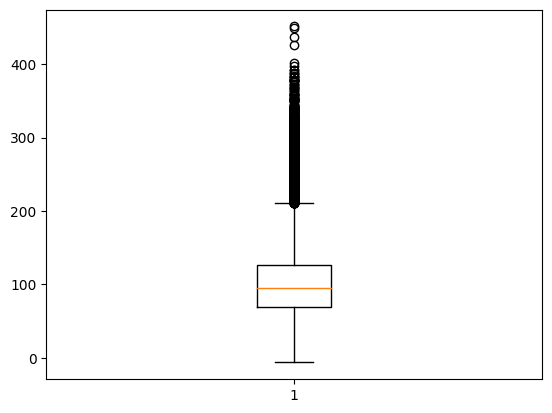

In [ ]:

# Visualize the distribution with a boxplot
plt.boxplot(df['adr'])
plt.show()

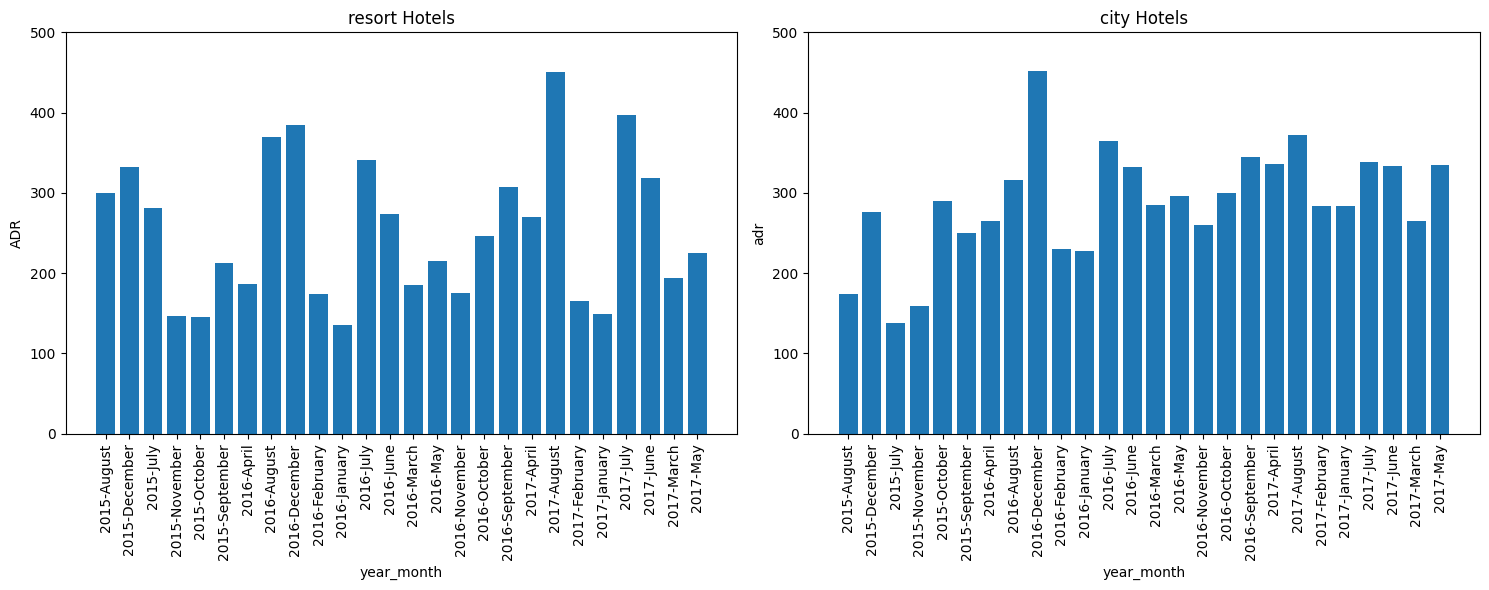

In [ ]:

x=df.iloc[0:40061,:]
y=df.iloc[40062:119391 , :]

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Group data by year and month, calculate average ADR (replace 'mean' with desired aggregation)
grouped_by_year_month_in_resort_hotel = x.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].max()
grouped_by_year_month_in_city_hotel = y.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].max()

#year_month = grouped_by_year_month  # Convert index to strings for formatting
year_month = [f"{y}-{m}" for y, m in grouped_by_year_month_in_resort_hotel.index]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 row, 2 columns
axes[0].set_ylim(0, 500)
axes[1].set_ylim(0, 500)
# Plot bar graphs for city and resort hotels
axes[0].bar(year_month,grouped_by_year_month_in_resort_hotel)  # Replace 'y_variable' with your actual Y-axis variable
axes[0].set_title('resort Hotels')
axes[0].set_xlabel('year_month')  # Adjust label based on 'variable_to_plot'
axes[0].set_ylabel('ADR')  # Replace with your Y-axis label

axes[1].bar(year_month,grouped_by_year_month_in_city_hotel)
axes[1].set_title('city Hotels')
axes[1].set_xlabel('year_month')  # Adjust label based on 'variable_to_plot'
axes[1].set_ylabel('adr')  # Replace with your Y-axis labe

axes[0].set_xticks(range(len(year_month)), year_month,rotation=90)
axes[1].set_xticks(range(len(year_month)), year_month,rotation=90)
#plt.xticks(rotation=45, horizontalalignment='right')  # Rotate x-axis labels for readability (optional)
plt.tight_layout()  # Adjust spacing between elements (optional)
plt.show()


In [ ]:
df.drop(df.loc[df['adr'] > 500].index, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119387 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119387 non-null  object 
 1   is_canceled                     119387 non-null  int64  
 2   lead_time                       119387 non-null  int64  
 3   arrival_date_year               119387 non-null  int64  
 4   arrival_date_month              119387 non-null  object 
 5   arrival_date_week_number        119387 non-null  int64  
 6   arrival_date_day_of_month       119387 non-null  int64  
 7   stays_in_weekend_nights         119387 non-null  int64  
 8   stays_in_week_nights            119387 non-null  int64  
 9   adults                          119387 non-null  int64  
 10  children                        119383 non-null  float64
 11  babies                          119387 non-null  int64  
 12  meal            

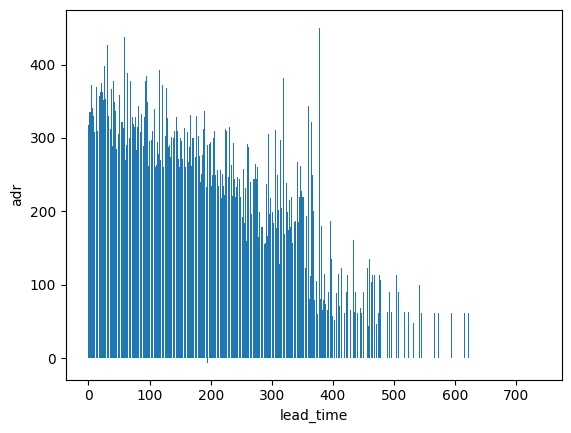

In [ ]:
plt.bar(df['lead_time'],df['adr'])
plt.xlabel("lead_time")
plt.ylabel("adr")
plt.show()

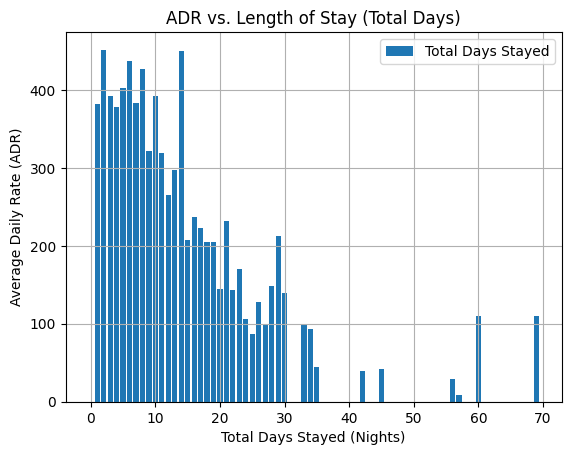

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by stays_in_week_nights and stays_in_weekend_nights, calculate average ADR
#weekdays_plot = df.groupby('stays_in_week_nights')['adr'].mean()
#weekends_plot = df.groupby('stays_in_weekend_nights')['adr'].mean()
df['total_days_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
total_days_stayed = df.groupby('total_days_stay')['adr'].max()
# Create the plot
plt.bar(total_days_stayed.index, total_days_stayed.values, label='Total Days Stayed')
plt.xlabel('Total Days Stayed (Nights)')
plt.ylabel('Average Daily Rate (ADR)')
plt.title('ADR vs. Length of Stay (Total Days)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16339
company         